# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('hasil_clustering.csv')

df.head(10)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,...,Channel_Encoded,CustomerOccupation_Encoded,Cluster_KMeans,Cluster_KMeans_PCA,Cluster_KMeans_Optimal,TransactionType_Inverse,Location_Inverse,Channel_Inverse,CustomerOccupation_Inverse,Cluster
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,...,0,0,0,0,0,Debit,San Diego,ATM,Doctor,0
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68,Doctor,141,1,13758.91,...,0,0,2,2,2,Debit,Houston,ATM,Doctor,2
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19,Student,56,1,1122.35,...,2,3,1,1,1,Debit,Mesa,Online,Student,1
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26,Student,25,1,8569.06,...,2,3,0,0,0,Debit,Raleigh,Online,Student,0
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,26,Student,198,1,7429.40,...,2,3,0,0,0,Credit,Atlanta,Online,Student,0
5,92.15,2024-11-04 08:06:36,Debit,Oklahoma City,ATM,18,Student,172,1,781.68,...,0,3,1,1,1,Debit,Oklahoma City,ATM,Student,1
6,7.08,2024-11-04 08:10:09,Credit,Seattle,ATM,37,Doctor,139,1,13316.71,...,0,0,2,2,2,Credit,Seattle,ATM,Doctor,2
7,171.42,2024-11-04 08:10:55,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24,...,1,2,1,1,1,Credit,Indianapolis,Branch,Retired,1
8,106.23,2024-11-04 08:11:14,Credit,Detroit,Branch,51,Engineer,86,1,9095.14,...,1,1,0,0,0,Credit,Detroit,Branch,Engineer,0
9,815.96,2024-11-04 08:06:32,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,...,0,0,1,1,1,Debit,Nashville,ATM,Doctor,1


In [3]:
print(f"Jumlah Baris : {df.shape[0]}")
print(f"Jumlah Kolom : {df.shape[1]}")

Jumlah Baris : 2282
Jumlah Kolom : 22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2282 non-null   float64
 1   TransactionDate             2282 non-null   object 
 2   TransactionType             2282 non-null   object 
 3   Location                    2282 non-null   object 
 4   Channel                     2282 non-null   object 
 5   CustomerAge                 2282 non-null   int64  
 6   CustomerOccupation          2282 non-null   object 
 7   TransactionDuration         2282 non-null   int64  
 8   LoginAttempts               2282 non-null   int64  
 9   AccountBalance              2282 non-null   float64
 10  TransactionType_Encoded     2282 non-null   int64  
 11  Location_Encoded            2282 non-null   int64  
 12  Channel_Encoded             2282 non-null   int64  
 13  CustomerOccupation_Encoded  2282 

In [5]:
df_processed = df.drop(
    ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 
     'TransactionType_Inverse', 'Location_Inverse', 'Channel_Inverse', 'CustomerOccupation_Inverse'], 
    axis=1
).copy()

In [6]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2282 non-null   float64
 1   CustomerAge                 2282 non-null   int64  
 2   TransactionDuration         2282 non-null   int64  
 3   LoginAttempts               2282 non-null   int64  
 4   AccountBalance              2282 non-null   float64
 5   TransactionType_Encoded     2282 non-null   int64  
 6   Location_Encoded            2282 non-null   int64  
 7   Channel_Encoded             2282 non-null   int64  
 8   CustomerOccupation_Encoded  2282 non-null   int64  
 9   Cluster_KMeans              2282 non-null   int64  
 10  Cluster_KMeans_PCA          2282 non-null   int64  
 11  Cluster_KMeans_Optimal      2282 non-null   int64  
 12  Cluster                     2282 non-null   int64  
dtypes: float64(2), int64(11)
memory u

In [7]:
df_processed.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Location_Encoded,Channel_Encoded,CustomerOccupation_Encoded,Cluster_KMeans,Cluster_KMeans_PCA,Cluster_KMeans_Optimal,Cluster
count,2282.000000,2282.000000,2282.000000,2282.0,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,255.525596,44.682734,118.972831,1.0,5119.550140,0.773006,21.076687,0.992989,1.513585,0.778703,0.776950,0.776950,0.776950
std,217.793773,17.711957,69.853628,0.0,3881.419806,0.418980,12.284826,0.806562,1.127955,0.703609,0.703055,0.703055,0.703055
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.847500,27.000000,63.000000,1.0,1515.460000,1.000000,10.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,198.315000,45.000000,111.000000,1.0,4762.410000,1.000000,21.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,376.255000,59.000000,161.000000,1.0,7641.830000,1.000000,31.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,903.190000,80.000000,300.000000,1.0,14977.990000,1.000000,42.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Memisahkan fitur (X) dan target (y)
X = df_processed.drop('Cluster', axis=1)
y = df_processed['Cluster']

# Membagi data training dan testing dengan hold-out Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah baris data training: {X_train.shape[0]}")
print(f"Jumlah baris data testing: {X_test.shape[0]}")

Jumlah baris data training: 1825
Jumlah baris data testing: 457


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5,  
    random_state=42
)

knn_model = KNeighborsClassifier(
    n_neighbors=10,
    metric='euclidean'
)

rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print('✅ Model training selesai untuk Random Forest, Decision Tree, dan Logistic Regression')


✅ Model training selesai untuk Random Forest, Decision Tree, dan Logistic Regression


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Random Forest
    Algoritma **Random Forest** adalah metode **ensemble learning** yang terdiri dari **pohon-pohon keputusan (Decision Trees)** untuk meningkatkan akurasi prediksi dan mengurangi overfitting. Dalam kode yang digunakan, **100 pohon keputusan** (`n_estimators=100`) dibuat secara acak, masing-masing dengan `max_depth` maksimum **10 level**. Setiap pohon dilatih menggunakan subset acak dari data, dan hasil akhirnya diperoleh dengan metode **voting mayoritas** untuk klasifikasi atau rata-rata untuk regresi. Parameter **`min_samples_split=5`** menentukan bahwa setiap node dalam pohon hanya akan bercabang jika memiliki minimal 5 sampel, sehingga mencegah pohon menjadi terlalu kompleks. Dengan adanya **random_state=42**, hasil yang diperoleh akan konsisten setiap kali model dijalankan.
2. K-Nearest Neighbors
    Algoritma **K-Nearest Neighbors (KNN)** adalah salah satu metode **machine learning berbasis instance-based learning** yang digunakan untuk **klasifikasi dan regresi**. KNN bekerja dengan **mencari sejumlah tetangga terdekat** dari suatu titik data berdasarkan metrik jarak tertentu, dalam hal ini **jarak Euclidean** (`metric='euclidean'`). Dalam kode yang digunakan, parameter **`n_neighbors=8`** berarti bahwa setiap prediksi akan ditentukan berdasarkan **8 titik data terdekat** dalam ruang fitur. Cara kerja KNN sangat intuitif: ketika model menerima input baru, ia menghitung jarak antara titik tersebut dengan seluruh data yang ada, lalu menentukan kelasnya berdasarkan mayoritas kelas dari 8 tetangga terdekat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


✅ Hasil Evaluasi Model (Data Testing):
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest    100.00     100.00  100.00    100.00
1  K-Nearest Neighbors     99.78      99.78   99.78     99.78


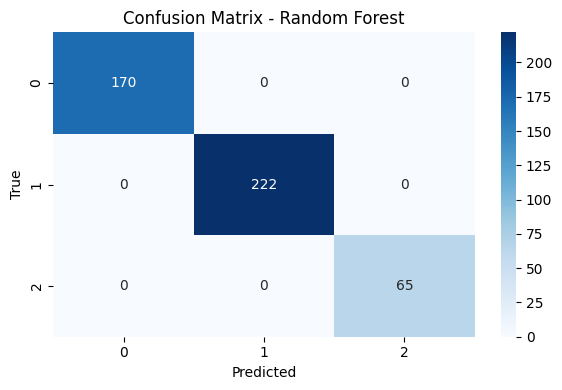

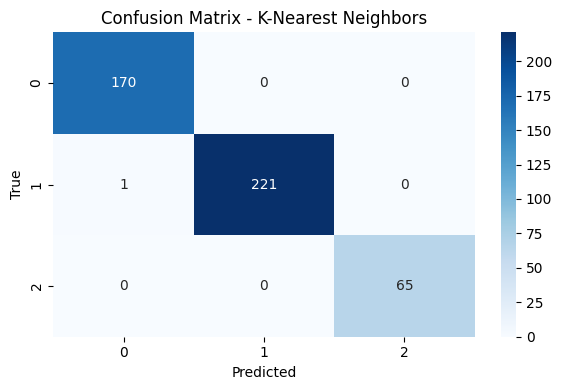

In [10]:
models = [rf_model, knn_model]
models_name = ['Random Forest', 'K-Nearest Neighbors']

model_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

for model, name in zip(models, models_name):
    y_pred = model.predict(X_test)

    model_results['Model'].append(name)
    model_results['Accuracy'].append(round(accuracy_score(y_test, y_pred) * 100, 2))
    model_results['Precision'].append(round(precision_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['Recall'].append(round(recall_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['F1-Score'].append(round(f1_score(y_test, y_pred, average='weighted') * 100, 2))

df_metrics = pd.DataFrame(model_results)
print("\n✅ Hasil Evaluasi Model (Data Testing):")
print(df_metrics)

for model, name in zip(models, models_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
knn = KNeighborsClassifier()

# Hyperparameter yang akan dituning
param_grid = {
    'n_neighbors': range(3, 16, 2),  # Mencoba nilai k dari 3 hingga 15 (ganjil untuk menghindari tie)
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'weights': ['uniform', 'distance']
}

# GridSearchCV untuk mencari kombinasi parameter terbaik
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Parameter terbaik untuk KNN:", grid_search.best_params_)
print("Akurasi terbaik pada cross-validation:", round(grid_search.best_score_ * 100, 2), "%")

# Menggunakan model terbaik
best_knn_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data testing
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan metrik evaluasi tambahan
print("\nEvaluasi Model Terbaik pada Data Testing:")
print(f"Akurasi: {round(accuracy * 100, 2)}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Parameter terbaik untuk KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Akurasi terbaik pada cross-validation: 99.67 %

Evaluasi Model Terbaik pada Data Testing:
Akurasi: 100.0%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00        65

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


✅ Hasil Evaluasi Model (Data Testing):
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest     100.0      100.0   100.0     100.0
1  K-Nearest Neighbors     100.0      100.0   100.0     100.0


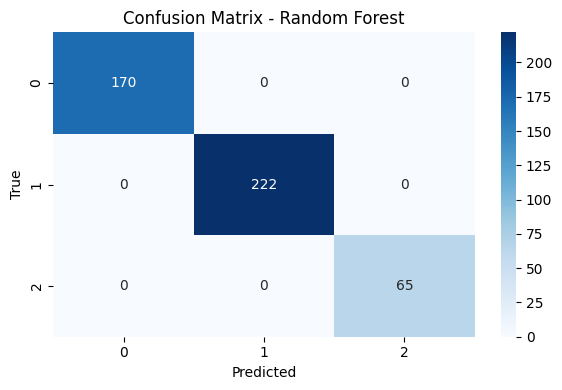

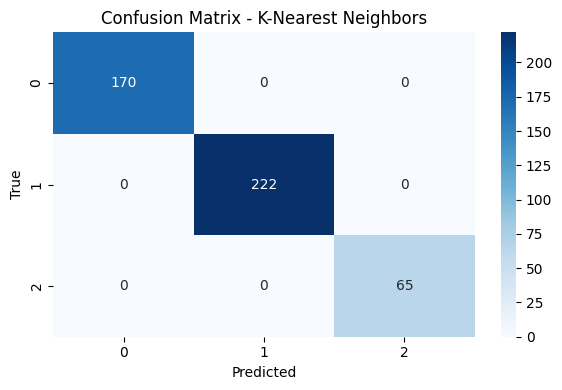

In [12]:
models = [rf_model, best_knn_model]
models_name = ['Random Forest', 'K-Nearest Neighbors']

model_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

for model, name in zip(models, models_name):
    y_pred = model.predict(X_test)

    model_results['Model'].append(name)
    model_results['Accuracy'].append(round(accuracy_score(y_test, y_pred) * 100, 2))
    model_results['Precision'].append(round(precision_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['Recall'].append(round(recall_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['F1-Score'].append(round(f1_score(y_test, y_pred, average='weighted') * 100, 2))

df_metrics = pd.DataFrame(model_results)
print("\n✅ Hasil Evaluasi Model (Data Testing):")
print(df_metrics)

for model, name in zip(models, models_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
#### 📌 **Evaluasi Model Machine Learning: Random Forest & KNN**

#### **1️⃣ Bandingkan Hasil Evaluasi Sebelum dan Sesudah Tuning**
| Model                | Akurasi Sebelum Tuning | Akurasi Sesudah Tuning |
|----------------------|----------------------|----------------------|
| **Random Forest**    | 100%                 | 100%                 |
| **K-Nearest Neighbors (KNN)** | 99.78%               | 100%                 |

---

#### **2️⃣ Identifikasi Kelemahan Model**
##### **🔹 Random Forest**
- **Overfitting**: Akurasi **100%** bisa menjadi tanda bahwa model **terlalu menghafal data latih**, bukan benar-benar **mempelajari pola**.
- **Kurang Interpretatif**: Dibandingkan **Decision Tree**, **Random Forest** lebih sulit dijelaskan karena menggunakan banyak pohon keputusan.

##### **🔹 K-Nearest Neighbors (KNN)**
- **Sensitif terhadap fitur yang tidak relevan**: Walaupun sudah menggunakan **StandardScaler**, KNN masih bisa mengalami **kesalahan jika ada fitur yang tidak relevan**.
- **Kompleksitas tinggi pada dataset besar**: Karena KNN mencari tetangga terdekat dari seluruh dataset, prediksi bisa **lambat** jika jumlah data besar.

---

#### **3️⃣ Rekomendasi Tindakan Lanjutan**
##### **✅ Random Forest**
- Mengurangi **max_depth** atau **n_estimators** agar model lebih sederhana.
- Menambahkan **regularization** dengan meningkatkan **min_samples_split**.
- Menggunakan **dataset yang lebih luas dan beragam** agar model lebih **general** dan tidak overfitting.

##### **✅ K-Nearest Neighbors**
- **Menyesuaikan jumlah k (n_neighbors)** → Meningkatkan nilai **n_neighbors > 11** untuk mengurangi sensitivitas terhadap **outlier**.
- **Menggunakan metric jarak yang berbeda**, seperti **minkowski** atau **cosine**, jika pola data lebih kompleks.
- **Memeriksa distribusi data asli** untuk memastikan tidak ada **data leakage** yang membuat model terlalu sempurna.

---

#### **📌 Kesimpulan**
🔹 **Hasil evaluasi model menunjukkan akurasi 100% setelah tuning, yang bisa menjadi tanda overfitting.**  
🔹 **Perlu dilakukan pengujian dengan dataset berbeda atau teknik regularisasi untuk memastikan model tidak hanya "menghafal" data latih.**  
🔹 **Dapat mencoba algoritma lain atau mengoptimalkan parameter lebih lanjut agar hasil lebih realistis.**  
